In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
import os

In [2]:
df_train = pd.read_csv("Train.csv")

In [3]:
df_test = pd.read_csv("Test.csv")

In [4]:
df_train.columns
#18 features in total

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [5]:
#drop column "id"
df_train.drop(['id'],axis=1,inplace=True)

In [6]:
#type of each column
df_train.dtypes

customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object

In [7]:
#proportion of null values of each column
#can not put object type of value into np.isnan
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
percent_missing

customer_age                         1.955952
job_type                             0.000000
marital                              0.473979
education                            0.000000
default                              0.000000
balance                              1.260783
housing_loan                         0.000000
personal_loan                        0.470819
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
term_deposit_subscribed              0.000000
dtype: float64

In [8]:
#drop every column which has missing values more than 40%
#drop column "days_since_prev_campaign_contact"
df_train.drop(['days_since_prev_campaign_contact'],axis=1,inplace=True)

In [9]:
#check whether it's an imbalanced data 
df_train['term_deposit_subscribed'].value_counts()

0    28253
1     3394
Name: term_deposit_subscribed, dtype: int64

In [10]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [11]:
#imputation of missing values

In [12]:
for column in df_train:
    if df_train[column].dtypes == "object":
        df_train[column] = df_train[column].fillna(df_train[column].mode().iloc[0])

In [13]:
percent_missing_again = df_train.isnull().sum() * 100 / len(df_train)
percent_missing_again

customer_age                  1.955952
job_type                      0.000000
marital                       0.000000
education                     0.000000
default                       0.000000
balance                       1.260783
housing_loan                  0.000000
personal_loan                 0.000000
communication_type            0.000000
day_of_month                  0.000000
month                         0.000000
last_contact_duration         0.982716
num_contacts_in_campaign      0.353904
num_contacts_prev_campaign    0.000000
prev_campaign_outcome         0.000000
term_deposit_subscribed       0.000000
dtype: float64

In [14]:
imputation_columns = ["customer_age","balance","last_contact_duration","num_contacts_in_campaign"]

In [15]:
for i in imputation_columns:
    if i == "num_contacts_in_campaign":
        df_train[i].fillna(1.0,inplace=True)
    else:
        df_train[i].fillna(round(df_train[i].mean()),inplace=True)

In [16]:
percent_missing_3 = df_train.isnull().sum() * 100 / len(df_train)
percent_missing_3

customer_age                  0.0
job_type                      0.0
marital                       0.0
education                     0.0
default                       0.0
balance                       0.0
housing_loan                  0.0
personal_loan                 0.0
communication_type            0.0
day_of_month                  0.0
month                         0.0
last_contact_duration         0.0
num_contacts_in_campaign      0.0
num_contacts_prev_campaign    0.0
prev_campaign_outcome         0.0
term_deposit_subscribed       0.0
dtype: float64

In [17]:
df_train

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,3,other,0
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,0,unknown,0
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,0,unknown,0
31645,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,0,unknown,0


In [18]:
pip install pycaret

  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\PySmy\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [19]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [20]:
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

In [21]:
for i in df_train.columns:
    if i == "term_deposit_subscribed":
        continue
    if df_train[i].dtypes == "object":
        df_train_model = one_hot_encoding(df_train,i)

In [22]:
df_train

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,3,other,0
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,0,unknown,0
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,0,unknown,0
31645,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,0,unknown,0


# Exploratory Data Analysis

In [23]:
import seaborn as sns # visualization
sns.set(style = 'white')
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt #visualization

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

Text(0.5, 1.0, 'Term deposit Distribution')

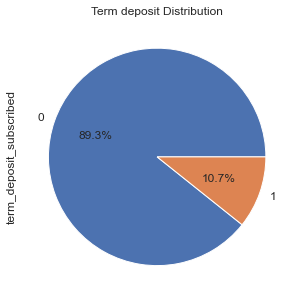

In [24]:
ax = (df_train['term_deposit_subscribed'].value_counts()*100.0 /len(df_train))\
.plot.pie(autopct='%.1f%%',figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Term deposit Distribution', fontsize = 12)

## 1.Univariate Analysis ##

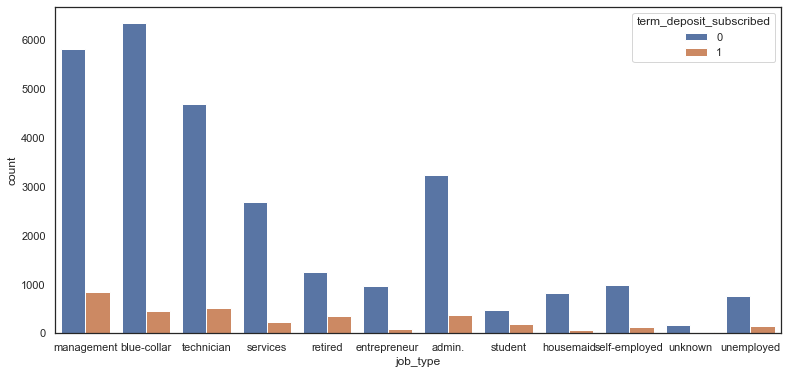

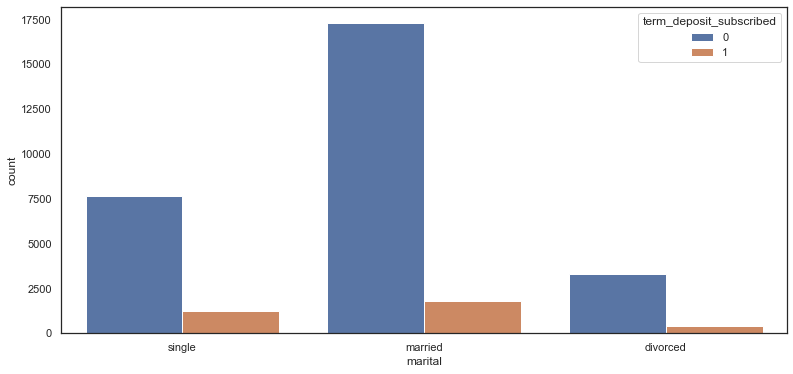

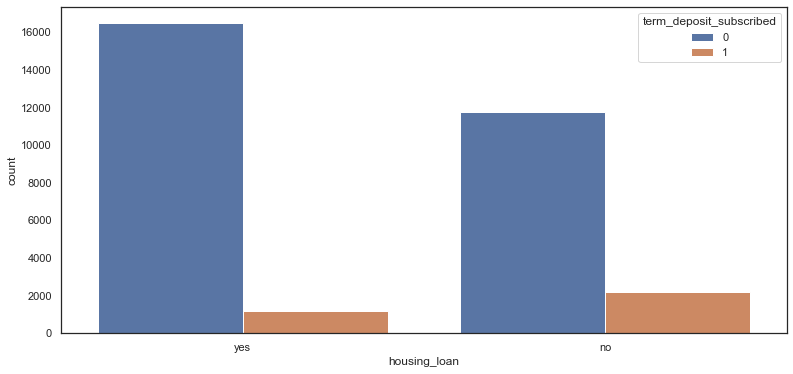

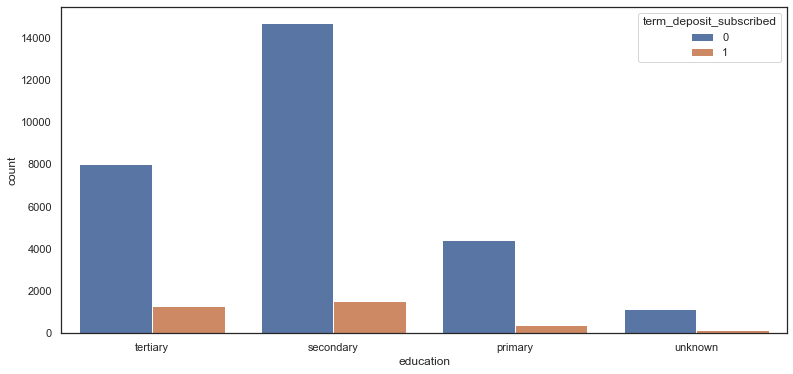

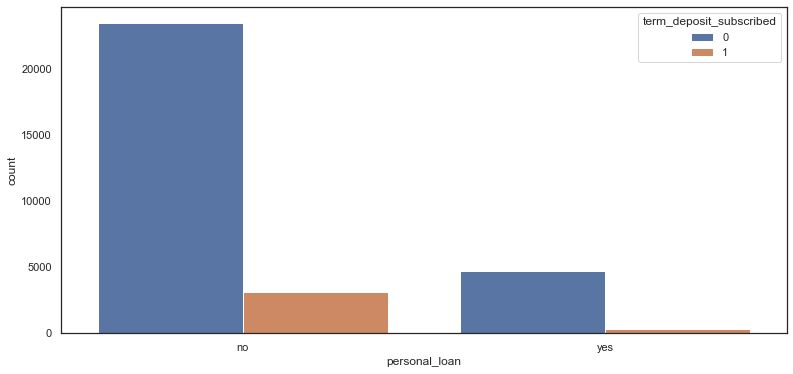

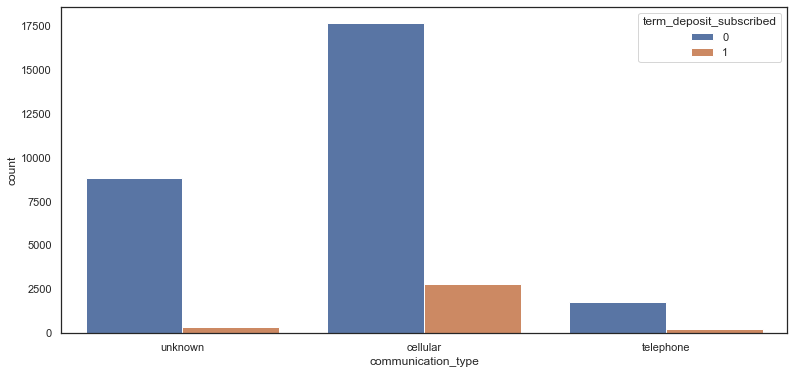

In [25]:
for i, predictor in enumerate(df_train[['job_type', 'marital', 'housing_loan', 'education', 'personal_loan', 'communication_type']]):
    plt.figure(figsize=(13,6))
    sns.countplot(data=df_train, x=predictor, hue='term_deposit_subscribed')

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



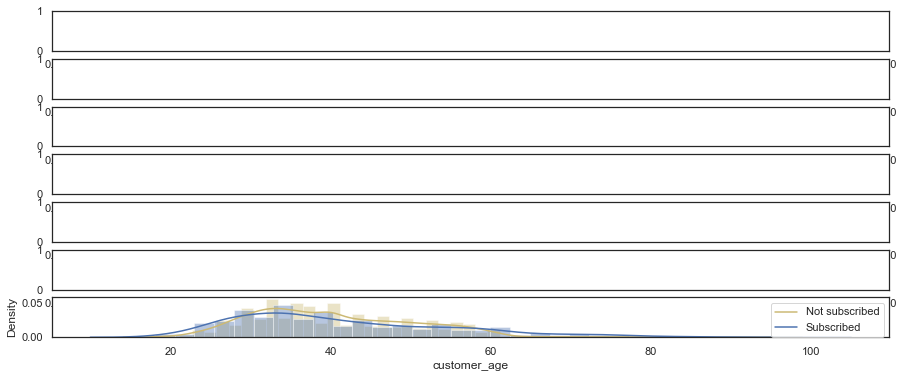

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



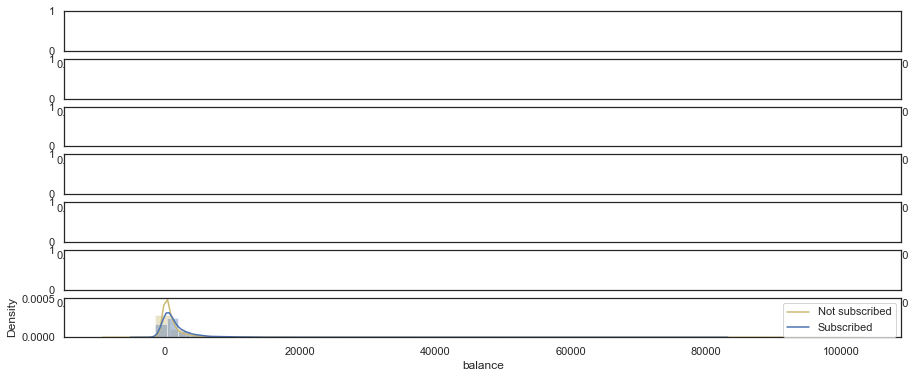

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



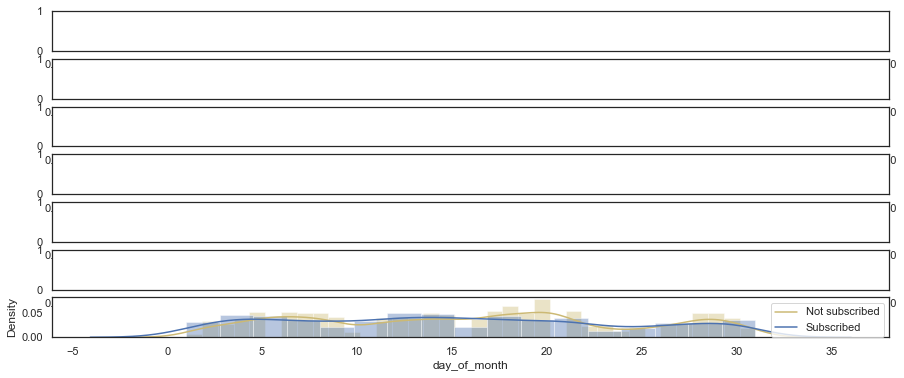

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



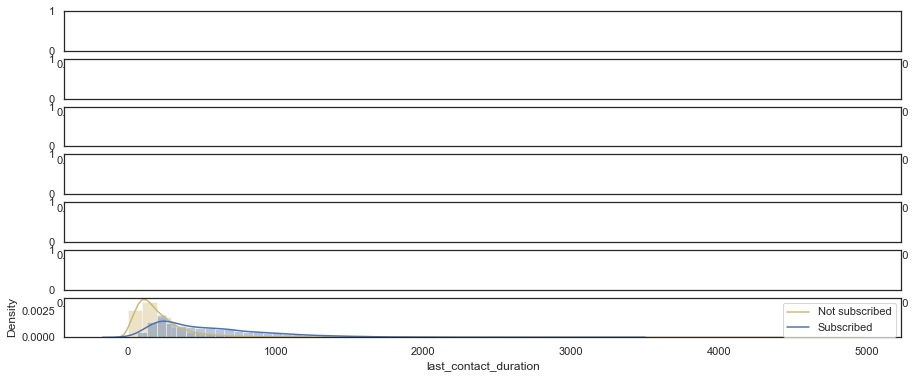

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



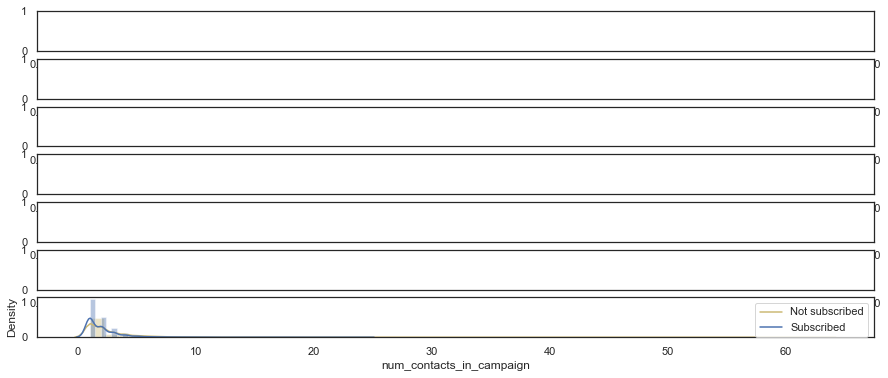

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



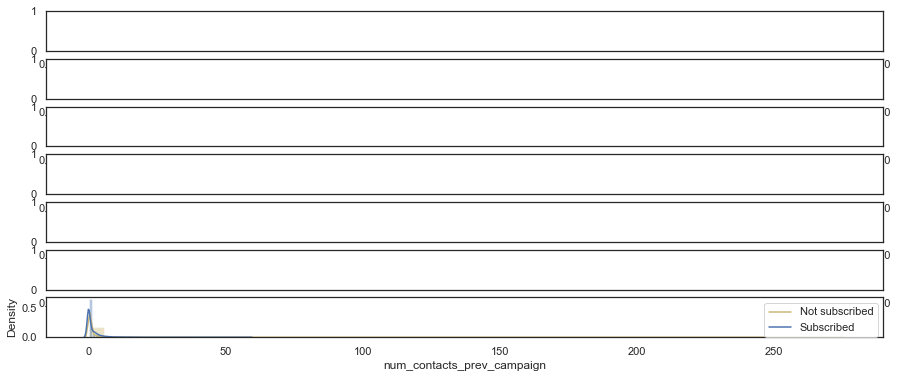

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



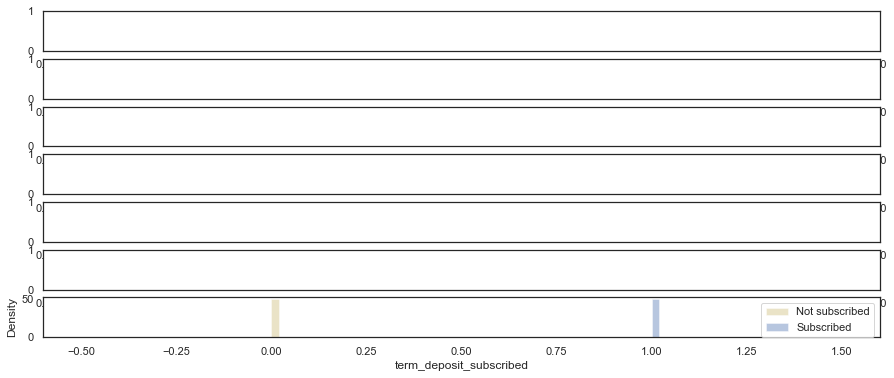

In [50]:
#what's wrong with it??
####
numeric_data = df_train._get_numeric_data()
for i in numeric_data.columns:
    plt.subplots(len(numeric_data.columns),1,figsize=(15,6))
    ax=sns.distplot(df_train[i][(df_train["term_deposit_subscribed"]==0)],color="y")
    ax=sns.distplot(df_train[i][(df_train["term_deposit_subscribed"]==1)],color="b")
    plt.legend(labels=['Not subscribed','Subscribed'],loc='upper right')
    plt.show()

In [ ]:
#how to handle imbalanced data?

In [ ]:
#distribution

# **Rebecca univariate analysis** #


## 1.0 Numerical variables analysis ##

## 1.1 Age ##

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



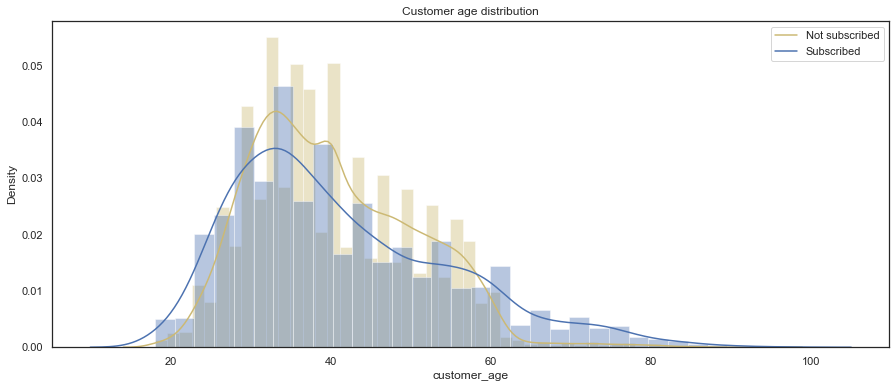

In [26]:
fig = plt.figure(figsize=(15,6))
ax=sns.distplot(df_train.customer_age[(df_train["term_deposit_subscribed"]==0)],color="y")
ax=sns.distplot(df_train.customer_age[(df_train["term_deposit_subscribed"]==1)],color="b")
plt.legend(labels=['Not subscribed','Subscribed'],loc='upper right')
plt.title("Customer age distribution")
plt.show()
#customer_age doesn't matter a lot

## 1.2 last contact duration ##

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



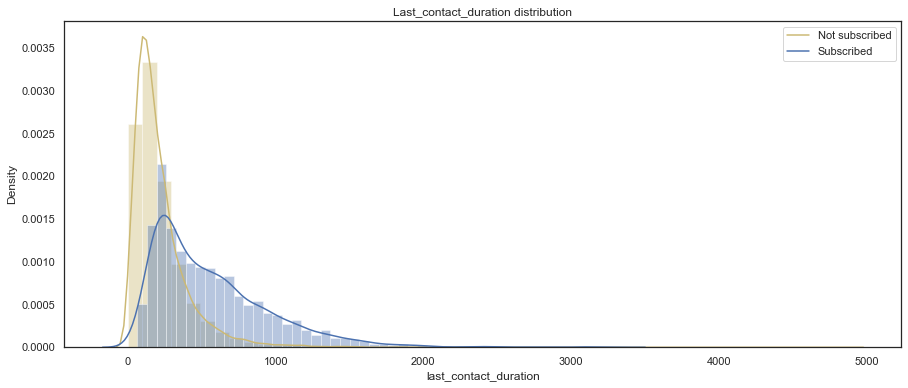

In [27]:
fig = plt.figure(figsize=(15,6))
ax=sns.distplot(df_train.last_contact_duration[(df_train["term_deposit_subscribed"]==0)],color="y")
ax=sns.distplot(df_train.last_contact_duration[(df_train["term_deposit_subscribed"]==1)],color="b")
plt.legend(labels=['Not subscribed','Subscribed'],loc='upper right')
plt.title("Last_contact_duration distribution")
plt.show()
#seems like subscribed customers have longer last_contact_duration

## 1.3 balance ##

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



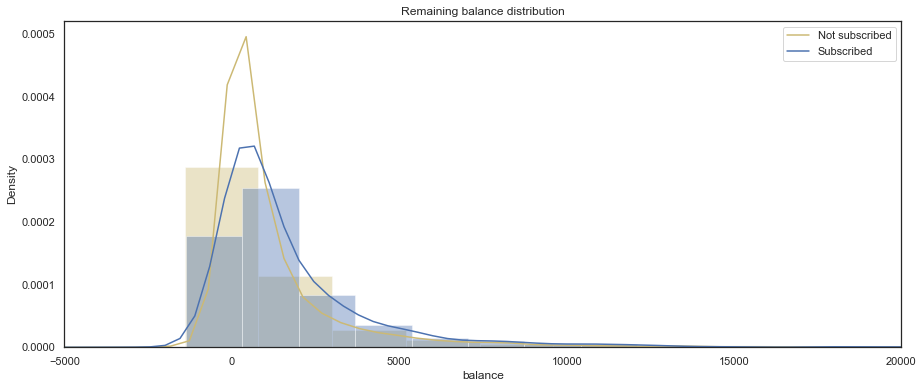

In [28]:
fig = plt.figure(figsize=(15,6))
ax=sns.distplot(df_train.balance[(df_train["term_deposit_subscribed"]==0)],color="y")
ax=sns.distplot(df_train.balance[(df_train["term_deposit_subscribed"]==1)],color="b")
plt.legend(labels=['Not subscribed','Subscribed'],loc='upper right')
plt.title("Remaining balance distribution")
plt.xlim(-5000,20000)
plt.show()
#balance seems doesn't matter?

## 1.4 day_of_month ##

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



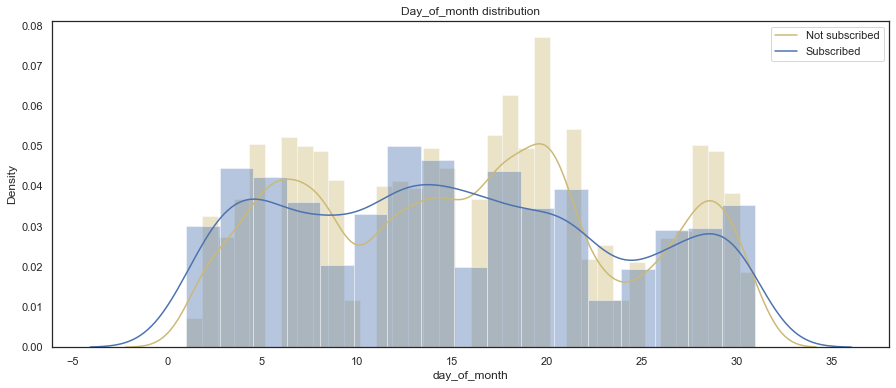

In [29]:
fig = plt.figure(figsize=(15,6))
ax=sns.distplot(df_train.day_of_month[(df_train["term_deposit_subscribed"]==0)],color="y")
ax=sns.distplot(df_train.day_of_month[(df_train["term_deposit_subscribed"]==1)],color="b")
plt.legend(labels=['Not subscribed','Subscribed'],loc='upper right')
plt.title("Day_of_month distribution")
plt.show()
#day_of_month seems doesn't matter?

## 1.5 Num_contacts_in_campaign ##

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



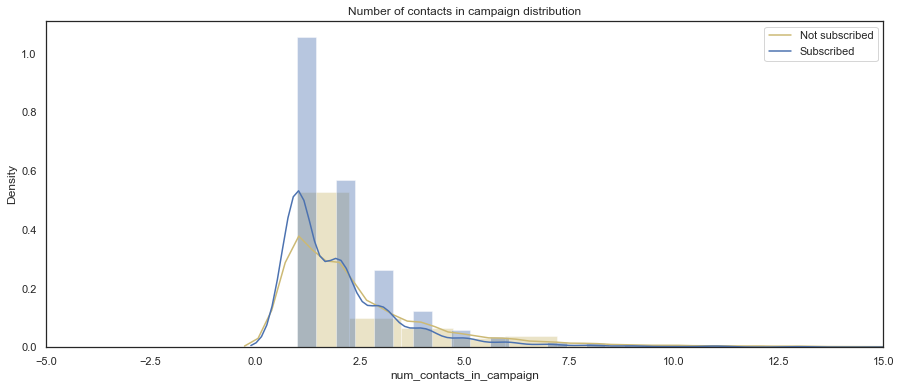

In [30]:
fig = plt.figure(figsize=(15,6))
ax=sns.distplot(df_train.num_contacts_in_campaign[(df_train["term_deposit_subscribed"]==0)],color="y")
ax=sns.distplot(df_train.num_contacts_in_campaign[(df_train["term_deposit_subscribed"]==1)],color="b")
plt.legend(labels=['Not subscribed','Subscribed'],loc='upper right')
plt.title("Number of contacts in campaign distribution")
plt.xlim(-5,15)
plt.show()

In [39]:
#there is no negative values for num_contacts_in_campaign
df_train[df_train['num_contacts_in_campaign']<0]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed


## 1.6 Num_contacts_previous_compaign ##

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\PySmy\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



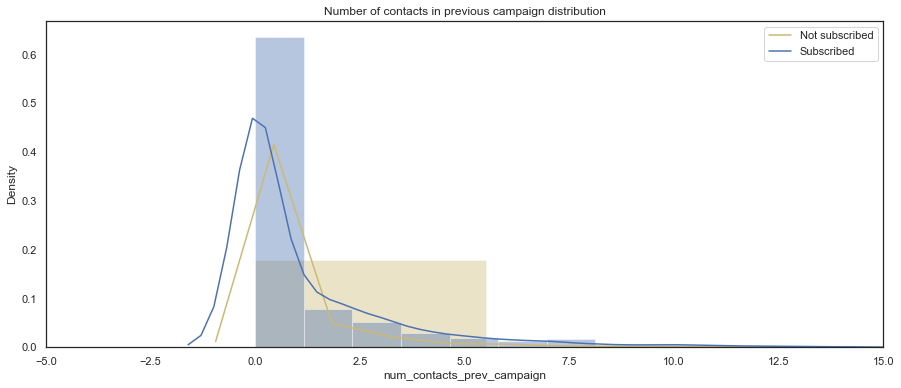

In [32]:
fig = plt.figure(figsize=(15,6))
ax=sns.distplot(df_train.num_contacts_prev_campaign[(df_train["term_deposit_subscribed"]==0)],color="y")
ax=sns.distplot(df_train.num_contacts_prev_campaign[(df_train["term_deposit_subscribed"]==1)],color="b")
plt.legend(labels=['Not subscribed','Subscribed'],loc='upper right')
plt.title("Number of contacts in previous campaign distribution")
plt.xlim(-5,15)
plt.show()
#subscribed customers seems have less number of contacts in previous campaign 

In [37]:
 #there is no negative values for num_contacts_prev_campaign
df_train[df_train['num_contacts_prev_campaign']<0]

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed


## 2.0 Categorical Variables analysis##

In [40]:
yes_subscription = df_train[df_train['term_deposit_subscribed']==1]
no_subscription = df_train[df_train['term_deposit_subscribed']==0]

In [41]:
#Write a function to configure pie chart

def plot_pie(column) :
    
    trace1 = go.Pie(values  = yes_subscription[column].value_counts().values.tolist(),
                    labels  = yes_subscription[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Subscribed Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                        ),
                    hole    = .6
                   )
    
    trace2 = go.Pie(values  = no_subscription[column].value_counts().values.tolist(),
                    labels  = no_subscription[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non subscribed Customers" 
                   )
    
    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "yessubscribed",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = .5),
                                           dict(text = "nosubscribed",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .80,y = .5
                                            )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [42]:
categorical = df_train.select_dtypes(include='object')

In [43]:
for i in categorical.columns:
    plot_pie(i)

In [ ]:
#customers who have subscribed tend not to have housing loans

In [ ]:
#job type doesn't play a big role in subscription

In [ ]:
#marital status doesn't play a big role in subscription

In [ ]:
#higher education, more likely to subscribe

In [ ]:
#cellular type of communication more likely to leads to subscription

In [ ]:
#month doesn't seem like influence subscription

# 2.0 Identify any outliers #

In [44]:
numeric = df_train.select_dtypes(include='float')

In [45]:
numeric.dtypes

customer_age                float64
balance                     float64
last_contact_duration       float64
num_contacts_in_campaign    float64
dtype: object

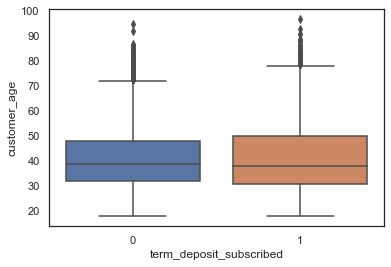

In [46]:
ax=sns.boxplot(x="term_deposit_subscribed",y="customer_age",data=df_train)

[(0.0, 30000.0)]

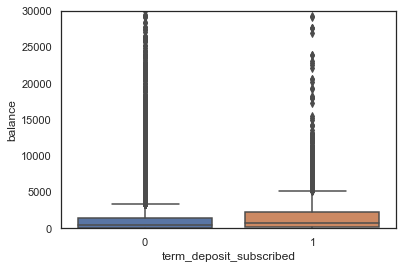

In [47]:
ax=sns.boxplot(x="term_deposit_subscribed",y="balance",data=df_train)
ax.set(ylim=(0,30000))

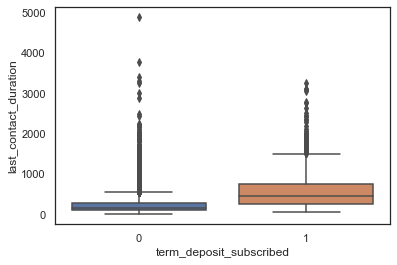

In [48]:
#should we remove the outliers?
ax=sns.boxplot(x="term_deposit_subscribed",y="last_contact_duration",data=df_train)


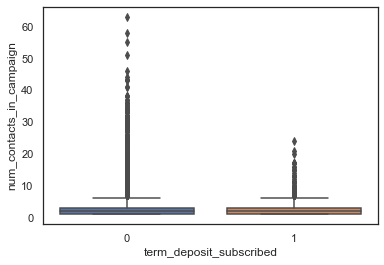

In [49]:
ax=sns.boxplot(x="term_deposit_subscribed",y="num_contacts_in_campaign",data=df_train)